Solow

# Dynamic Programming  
**Contents:** Bellman equation, contraction mapping, Value Function Iteration (VFI), Policy Iteration, Endogenous Grid Method (EGM), numerical examples (VFI code) and exercises.

> This notebook contains lecture notes (markdown) and runnable Python examples for the numerical sections.  


## Learning objectives
After working through this notebook, you should be able to:
1. State and interpret the Bellman equation and the principle of optimality.  
2. Sketch why the Bellman operator is a contraction and why a unique fixed point exists.  
3. Implement Value Function Iteration (VFI) for a simple stochastic consumption–savings problem.  
4. Know advantages and limitations of alternative solution methods: policy iteration, EGM, collocation.  
5. Connect Bellman/Euler approaches and understand numerical tradeoffs.


# What is the Bellman equation?

The **Bellman equation** is the fundamental recursive identity in dynamic programming and Markov decision processes (MDPs).  It encodes the **principle of optimality**: the value of being in a state equals the best immediate reward plus the (discounted) value of the next state when following an optimal policy.

## Deterministic Bellman equation

State $s\in\mathcal S$, action $a\in\mathcal A(s)$. Deterministic law $s' = f(s,a)$. Discount factor $0<\beta<1$.

The Bellman equation:
$$
V(s)=\max_{a\in\mathcal A(s)} \{ u(s,a) + \beta V(f(s,a)) \}.
$$

**Example (deterministic consumption–savings):**  
State: assets $a$. Control: next-period assets $a'$ (or consumption $c$). Budget: $c = (1+r)a + y - a'$.  
Bellman:
$$
V(a)=\max_{a'\ge\underline a} \{ u((1+r)a+y-a') + \beta V(a') \}.
$$

Using the envelope theorem and FOC you can derive the Euler equation when interior.

## General (discrete-time, stochastic) form

Let:
- $s$ be the current state (from state space $\mathcal S$),  
- $a$ an action (from the action set $\mathcal A(s)$),  
- $r(s,a)$ the immediate reward when taking $a$ in $s$,  
- $P(s' \mid s,a)$ the probability of next state $s'$,  
- $\beta \in (0,1)$ the discount factor, and  
- $V(s)$ the value function (maximal expected discounted reward starting from $s$).

The **Bellman optimality equation** is  

$$
\boxed{\,V(s) = \max_{a\in\mathcal A(s)}\left\{ r(s,a) + \beta \sum_{s'} P(s'\mid s,a)\,V(s') \right\} \,}
$$

For a fixed policy $\pi$ the Bellman (policy) equation is  

$$
V^\pi(s) = r(s,\pi(s)) + \beta \sum_{s'} P(s'\mid s,\pi(s))\,V^\pi(s').
$$

---
# 🍰 The Cake-Eating Problem

Classic problem in programming: you are given a whole cake of some size $k$.

How should you choose a **consumption stream**?

  - Maximize lifetime utility 
  - Account for discounting  
  - The cake will go bad at some point  

Dynamic problems involve **returns now vs. returns later**.

  - An obvious tradeoff:
    - Delaying consumption is costly (discount factor)
    - But delaying may be beneficial (due to concave utility)
  - $\implies$ eat some today and some tomorrow

- How much to eat today? (assume it goes bad in $T$ days)
  - all of it on day 1?
  - $1/T$ each day?
  - But you'd rather eat more today than tomorrow.
- Implication: eat **more on the first day**, **less and less on the following days**.

---
# Analytical Solution of the Cake-Eating Problem

We start with a finite horizon $T$, an initial cake size $k_0$, and no uncertainty. The agent chooses a consumption sequence $\{c_t\}_{t=0}^T$.

## 1. Setup

- Initial cake: $k_0 > 0$ given.
- Law of motion for the cake:
  $$
  k_{t+1} = k_t - c_t, \quad t = 0,1,\dots,T
  $$
- No borrowing and no negative cake:
  $$
  c_t \ge 0, \quad k_t \ge 0.
  $$
- Cake spoils after date $T$, so it is optimal to end with no cake:
  $$
  k_{T+1} = 0.
  $$

Preferences: CRRA utility
$$
u(c_t) = \frac{c_t^{1-\gamma}}{1-\gamma}, \quad \gamma > 0, \ \gamma \ne 1,
$$
and discount factor $0 < \beta < 1$.

The agent maximizes:
$$
\max_{\{c_t\}_{t=0}^T} \; \sum_{t=0}^T \beta^t u(c_t)
$$
subject to the cake dynamics and $k_0$ given.

---

## 2. Intertemporal budget constraint

From
$$
k_{t+1} = k_t - c_t
$$
we can iterate forward:
- $k_1 = k_0 - c_0$
- $k_2 = k_1 - c_1 = k_0 - c_0 - c_1$
- ...
- $k_{T+1} = k_0 - \sum_{t=0}^T c_t$.

Imposing $k_{T+1} = 0$ gives:
$$
k_{T+1} = k_0 - \sum_{t=0}^T c_t = 0
\quad \Rightarrow \quad
\sum_{t=0}^T c_t = k_0.
$$

So the **resource constraint** is simply: total consumption over the $T+1$ periods equals the initial cake.

---

## 3. Euler equation

We can write the Lagrangian (or rely on dynamic programming, same Euler):

Maximize
$$
\sum_{t=0}^T \beta^t u(c_t)
$$
subject to $\sum_{t=0}^T c_t = k_0$.

Introduce a multiplier $\lambda$ on the resource constraint:
$$
\mathcal{L} = \sum_{t=0}^T \beta^t u(c_t) + \lambda \left(k_0 - \sum_{t=0}^T c_t\right).
$$

First-order condition for each $c_t$:
$$
\frac{\partial \mathcal{L}}{\partial c_t}
= \beta^t u'(c_t) - \lambda = 0
\quad \Rightarrow \quad
\beta^t u'(c_t) = \lambda.
$$

For CRRA,
$$
u'(c_t) = c_t^{-\gamma}.
$$

So
$$
\beta^t c_t^{-\gamma} = \lambda.
$$

Take two adjacent periods, $t$ and $t+1$:
$$
\beta^t c_t^{-\gamma} = \lambda, \qquad
\beta^{t+1} c_{t+1}^{-\gamma} = \lambda.
$$

Set them equal (since both equal $\lambda$):
$$
\beta^t c_t^{-\gamma} = \beta^{t+1} c_{t+1}^{-\gamma}.
$$

Divide both sides by $\beta^t$:
$$
c_t^{-\gamma} = \beta c_{t+1}^{-\gamma}.
$$

Rearrange:
$$
c_{t+1}^{-\gamma} = \beta^{-1} c_t^{-\gamma}.
$$

Raise both sides to the power $-1/\gamma$:
$$
c_{t+1} = \beta^{1/\gamma} c_t.
$$

This is the **Euler equation** in this problem: consumption follows a geometric path.

Define
$$
g \equiv \beta^{1/\gamma}, \quad 0 < g < 1.
$$

Then
$$
c_{t+1} = g \, c_t \quad \Rightarrow \quad c_t = g^t c_0.
$$

So consumption is geometrically declining over time.

---

## 4. Use the resource constraint to pin down $c_0$

We have:
$$
c_t = g^t c_0, \quad t=0,\dots,T,
$$
and the resource constraint:
$$
\sum_{t=0}^T c_t = k_0.
$$

Substitute the geometric sequence:
$$
\sum_{t=0}^T c_t
= \sum_{t=0}^T g^t c_0
= c_0 \sum_{t=0}^T g^t
= c_0 \frac{1 - g^{T+1}}{1 - g}
= k_0.
$$

Solve for $c_0$:
$$
c_0 = k_0 \, \frac{1 - g}{1 - g^{T+1}}.
$$

Recall $g = \beta^{1/\gamma}$, so
$$
c_0 = k_0 \, \frac{1 - \beta^{1/\gamma}}{1 - \beta^{(T+1)/\gamma}}.
$$

Then the entire path is:
$$
c_t = g^t c_0
= \beta^{t/\gamma} \, k_0 \, \frac{1 - \beta^{1/\gamma}}{1 - \beta^{(T+1)/\gamma}},
\quad t = 0,1,\dots,T.
$$

This is the **analytic solution for the optimal consumption path**.

---

## 5. Log-utility as a special case

For log utility, $u(c_t) = \ln c_t$, this corresponds to the limit $\gamma \to 1$.

The Euler equation becomes:
$$
u'(c_t) = \frac{1}{c_t}, \quad
\frac{1}{c_t} = \beta \, \frac{1}{c_{t+1}}
\quad \Rightarrow \quad
c_{t+1} = \beta \, c_t.
$$

So now $g = \beta$ and
$$
c_t = \beta^t c_0.
$$

The resource constraint:
$$
\sum_{t=0}^T c_t
= c_0 \sum_{t=0}^T \beta^t
= c_0 \frac{1 - \beta^{T+1}}{1 - \beta}
= k_0.
$$

Hence
$$
c_0 = k_0 \, \frac{1 - \beta}{1 - \beta^{T+1}}.
$$

And the path:
$$
c_t = \beta^t \, k_0 \, \frac{1 - \beta}{1 - \beta^{T+1}}, \quad t=0,\dots,T.
$$

---

## 6. Infinite-horizon case (for completeness)

If we let $T \to \infty$, the cake never “spoils,” but the horizon is infinite and discounting ensures finite utility.

For $0 < g < 1$, the infinite geometric sum is:
$$
\sum_{t=0}^\infty g^t = \frac{1}{1-g}.
$$

The resource constraint $\sum_{t=0}^\infty c_t = k_0$ becomes:
$$
c_0 \frac{1}{1 - g} = k_0
\quad \Rightarrow \quad
c_0 = (1 - g) k_0.
$$

So
$$
c_t = g^t c_0 = g^t (1 - g) k_0.
$$

Substitute $g = \beta^{1/\gamma}$:
$$
c_t = \beta^{t/\gamma} (1 - \beta^{1/\gamma}) k_0.
$$

For log utility ($\gamma = 1$), this becomes:
$$
c_t = \beta^t (1 - \beta) k_0.
$$

---

## 7. Summary of the analytical solution

- **Euler equation (CRRA):**
  $$
  c_{t+1} = \beta^{1/\gamma} c_t.
  $$

- **Finite-horizon optimal consumption path:**
  $$
  c_t = \beta^{t/\gamma} \, k_0 \, \frac{1 - \beta^{1/\gamma}}{1 - \beta^{(T+1)/\gamma}}, 
  \quad t = 0,\dots,T.
  $$

- **Log-utility special case ($\gamma = 1$):**
  $$
  c_t = \beta^t \, k_0 \, \frac{1 - \beta}{1 - \beta^{T+1}}.
  $$

- **Infinite horizon (no spoilage, but discounting):**
  $$
  c_t = \beta^{t/\gamma} (1 - \beta^{1/\gamma}) k_0,
  $$
  and, for log utility,
  $$
  c_t = \beta^t (1 - \beta) k_0.
  $$

This is the full **analytic solution** of the cake-eating problem: the optimal consumption path is geometric, determined by the discount factor $\beta$, the curvature $\gamma$, the horizon $T$, and the initial cake size $k_0$.



---

# 💡 A simple example

- Preferences: $u(c_t) = \ln(c_t)$  
- specifically, **CRRA preferences**:

  $$
  u(c_t) = \frac{c_t^{1 - \gamma}}{1 - \gamma}, \quad (\gamma > 0, \, \gamma \ne 1)
  $$

  where $c_t$ is the amount of cake eaten at time $t$.

- Discount factor: $\beta < 1$  
- Curvature of utility: $\gamma$

- The present value of the consumption stream is:

  $$
  W(c_1, c_2, \ldots, c_T) = \sum_{t=1}^{T} \beta^t u(c_t)
  $$

- Goal: **maximize** $W$ by choosing the sequence $\{ c_t \}$.

- Size of cake at time $t$:

  $$
  k_{t+1} = k_t - c_t
  $$

- And, of course, $k_t \ge 0$.

- Let $V(k)$ be the **maximum lifetime utility** attainable when you have $k$ units of cake left:

  $$
  V(k) = \max \sum_{t=0}^{\infty} \beta^t u(c_t)
  $$

---

## The Bellman equation

- The value function $V(k)$ satisfies the **Bellman equation**:

  $$
  V(k) = \max_{0 \le c \le k} \{ u(c) + \beta V(k - c) \}, \quad \text{for any given } k \ge 0
  $$

- Where:
  - $k_t$ is the **state variable**
  - $c_t$ is the **control (action) variable**
  - $\beta$ and $\gamma$ are **parameters**

## First-order conditions

- Substitute the constraint into the objective function:

  $$
  \beta^t u(k_{t-1} - k_t) + \beta^{t+1} u(k_t - k_{t+1})
  $$
# ✅ Deriving the Euler Equation in the Cake-Eating Problem

We start with the objective for two adjacent periods after substituting the resource constraint:

$$
\beta^{t} u(k_{t-1} - k_t) + \beta^{t+1} u(k_t - k_{t+1})
$$

Define consumptions as

$$
c_{t-1} = k_{t-1} - k_t, \qquad c_t = k_t - k_{t+1}.
$$

So the objective can be written as

$$
\beta^{t} u(c_{t-1}) + \beta^{t+1} u(c_t).
$$

We now take the derivative with respect to $k_t$.

---

### Step 1. Derivative of the first term

$$
\frac{\partial}{\partial k_t} \big[\beta^{t} u(k_{t-1} - k_t)\big]
= \beta^{t} u'(k_{t-1} - k_t) \cdot \frac{\partial (k_{t-1} - k_t)}{\partial k_t}.
$$

Since $\frac{\partial (k_{t-1} - k_t)}{\partial k_t} = -1$, this becomes

$$
- \beta^{t} u'(k_{t-1} - k_t)
= - \beta^{t} u'(c_{t-1}).
$$

---

### Step 2. Derivative of the second term

$$
\frac{\partial}{\partial k_t} \big[\beta^{t+1} u(k_t - k_{t+1})\big]
= \beta^{t+1} u'(k_t - k_{t+1}) \cdot \frac{\partial (k_t - k_{t+1})}{\partial k_t}.
$$

Here $\frac{\partial (k_t - k_{t+1})}{\partial k_t} = 1$, so we get

$$
\beta^{t+1} u'(k_t - k_{t+1})
= \beta^{t+1} u'(c_t).
$$

---

### Step 3. First-order condition

Add the two derivatives and set equal to zero:

$$
- \beta^{t} u'(c_{t-1}) + \beta^{t+1} u'(c_t) = 0.
$$

Simplify:

$$
\beta^{t+1} u'(c_t) = \beta^{t} u'(c_{t-1})
\quad \Rightarrow \quad
u'(c_{t-1}) = \beta u'(c_t).
$$

---

### Step 4. Euler equation (general form)

Relabel indices (replace $t-1$ by $t$) to obtain the standard **Euler equation**:

$$
u'(c_t) = \beta u'(c_{t+1}).
$$

---

### 💡 Interpretation

- The Euler equation equates the **marginal utility of consuming today** with the **discounted marginal utility of consuming tomorrow**.  
- It describes the **optimal intertemporal tradeoff** between consuming now and saving for later.  
- With CRRA utility $u(c) = \frac{c^{1-\gamma}}{1-\gamma}$, it implies  
  $$
  c_{t+1} = \beta^{1/\gamma} c_t,
  $$
  so consumption declines geometrically over time.

## Solution

- Using CRRA utility:

  $$
  c_{t+1} = \beta \, c_t
  $$

- Solve this backward in time.

- In the optimum, no cake should be left over: $k_{T+1} = 0$.

  So $c_T = k_T$.

- By recursive substitution, the initial consumption is:

  $$
  c_0 = \frac{1 - \beta}{1 - \beta^{T+1}} \, k_0
  $$

- And using $c_{t+1} = \beta c_t$, we can find the entire path of consumption over time.

---

## Summary

- The cake-eating problem illustrates **intertemporal choice**:
  - Tradeoff between consuming today vs. saving for tomorrow.
  - Discounting captures impatience.
  - Concavity captures diminishing marginal utility.

- The **Bellman equation** formulation:

  $$
  v(k) = \max_{0 \le c \le k} \{ u(c) + \beta v(k - c) \}
  $$

  provides the foundation for dynamic programming and recursive methods in economics.
  

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy import stats as st
from scipy import optimize
from scipy.optimize import minimize_scalar, bisect
from typing import NamedTuple
import time            # Imports system time module to time your script

plt.close('all')  # close all open figures

T = 9
beta = 0.96
kv = np.zeros(T+1,float)
cv = np.zeros(T+1,float)
uv = np.zeros(T+1,float)
kv[0] = 100  # k0
cv[0] = (1.0-beta)/(1.0-beta**(T+1)) * kv[0]  # c0
uv[0] = np.log(cv[0])

for i in range(1,T+1):
    #print "i=" + str(i)
    cv[i] = beta * cv[i-1]
    kv[i] = kv[i-1] - cv[i-1]

    # Period utility with discounting
    uv[i] = beta**i *np.log(cv[i])

np.sum(uv)  # total utility

print("cv = " + str(cv))
print("kv = " + str(kv))

cv = [11.93433618 11.45696274 10.99868423 10.55873686 10.13638738  9.73093189
  9.34169461  8.96802683  8.60930576  8.26493353]
kv = [100.          88.06566382  76.60870108  65.61001685  55.05127999
  44.91489261  35.18396072  25.84226611  16.87423928   8.26493353]


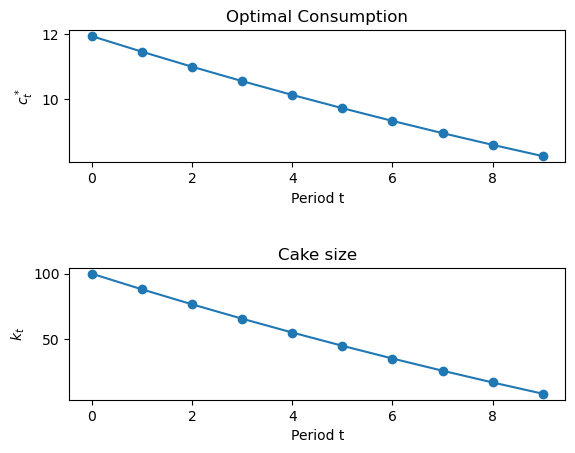

In [4]:
fig, ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=0.4, hspace=0.8)
#
ax[0].plot(cv, '-o')
ax[0].set_ylabel(r'$c^*_t$')
ax[0].set_xlabel('Period t')
ax[0].set_title('Optimal Consumption')
#
ax[1].plot(kv, '-o')
ax[1].set_ylabel(r'$k_t$')
ax[1].set_xlabel('Period t')
ax[1].set_title('Cake size')
#
plt.show()

From the lecture notes and using $u(c_{t}) = \frac{c^{1-\gamma}}{1-\gamma}, \: (\gamma > 0, \gamma \ne 1)$ as the utility function, the maximization problem gives the solution as $v^{*}$ 

$$ v^{*}(k) = \left(1-\beta^{1/\gamma}\right)^{-\gamma} u(k),$$

that solves the Bellman equation and therefore equals the value function. Note that this analytic solution is only possible due to the CRRA preferences. We can explore this a little deeper using Python to understand what is going on. The utility function and value function in Python: 

In [5]:
def u(c, γ):

    return c**(1 - γ) / (1 - γ)
def v_star(k, β, γ):

    return (1 - β**(1 / γ))**(-γ) * u(k, γ)

Let's see this function for some parameters.

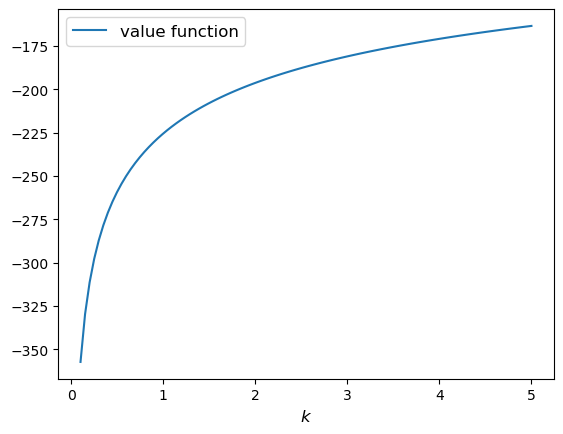

In [6]:
β, γ = 0.95, 1.2
k_grid = np.linspace(0.1, 5, 100)

fig, ax = plt.subplots()

ax.plot(k_grid, v_star(k_grid, β, γ), label='value function')

ax.set_xlabel('$k$', fontsize=12)
ax.legend(fontsize=12)

plt.show()

Homework. You have now seen how to solve the deterministic case. Suppose you have a sneaky sister who pops in randomly and eats some of the cake. With some probability when you go to get some cake there is less there than you remembered. 

(A) Intuition...how will this affect your eating of the cake? That is, given the size of the cake you are left with, should you eat more or less compared to the no sister case?

(B) Write some python code to explore this problem. Is your intuition correct? If so, is it really correct? If not, why not?

## Deterministic Bellman equation in a standard consumption choice model

State $s\in\mathcal S$, action $a\in\mathcal A(s)$. Deterministic law $s' = f(s,a)$. Discount factor $0<\beta<1$.

The Bellman equation:
$$
V(s)=\max_{a\in\mathcal A(s)} \{ u(s,a) + \beta V(f(s,a)) \}.
$$

**Example (deterministic consumption–savings):**  
State: assets $a$. Control: next-period assets $a'$ (or consumption $c$). Budget: $c = (1+r)a + y - a'$.  
Bellman:
$$
V(a)=\max_{a'\ge\underline a} \{ u((1+r)a+y-a') + \beta V(a') \}.
$$

Using the envelope theorem and FOC you can derive the Euler equation when interior.

## Stochastic Bellman equation

With Markov income shock $y_t$ and assets $a_t$:
$$
V(a,y)=\max_{a'\ge\underline a} \{ u((1+r)a + y - a') + \beta \sum_{y'} P(y'|y) V(a',y') \}.
$$

We typically discretize assets and the shock support, then compute the Bellman operator on the finite grid.


# Contraction Mappings: Intuition and Simple Examples

A **contraction mapping** is a function that brings points closer together every time you apply it.

Formally, a function $ T: X \to X $ on a space with distance $ d(\cdot,\cdot) $ is a **contraction** if:

$$
d(T(x), T(y)) \le \beta \, d(x,y) \quad \forall x,y \in X, \quad \text{for some } 0 \le \beta < 1.
$$

Key properties:
- **Monotonicity:** if $x\ge y$ then $Tx\ge Ty$.  
- **Contraction:** $\|Tx-Ty\|_\infty \le \beta \|x-y\|_\infty$, so with $0<\beta<1$ Banach fixed-point gives a unique solution and geometric convergence of iterates.
---

## Why is this important?

The **Contraction Mapping Theorem (Banach Fixed Point Theorem)** says:

> If $T$ is a contraction on a complete space $(X,d)$, then:
> 1. There exists a **unique** fixed point $x^*$ such that $T(x^*) = x^*$.
> 2. Starting from any initial $x_{0}$, repeated iteration $x_{n+1} = T(x_n)$ converges to $x^*$.

This is the foundation of **dynamic programming** — the Bellman operator is a contraction, and its fixed point is the unique value function $V^{*}$.

---

## Example 1: A Simple Shrinking Function

Let $T(x) = 0.5x$.  
Then:
$$
|T(x) - T(y)| = 0.5|x - y| \implies \beta = 0.5.
$$

It’s a contraction, and the fixed point satisfies $x = 0.5x \to x^* = 0.$


Define operator $T$ on bounded functions:
$$
(Tv)(s) = \sup_{a\in\mathcal A(s)} \{ u(s,a) + \beta \mathbb{E}[v(s')\mid s,a] \}.
$$



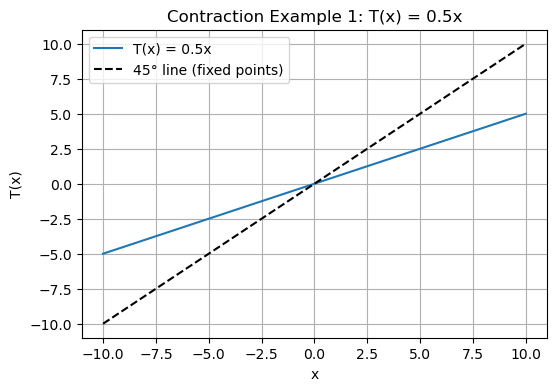

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Example 1: T(x) = 0.5x
T = lambda x: 0.5 * x
x_vals = np.linspace(-10, 10, 200)

plt.figure(figsize=(6,4))
plt.plot(x_vals, T(x_vals), label="T(x) = 0.5x")
plt.plot(x_vals, x_vals, 'k--', label="45° line (fixed points)")
plt.title("Contraction Example 1: T(x) = 0.5x")
plt.xlabel("x")
plt.ylabel("T(x)")
plt.legend()
plt.grid(True)
plt.show()


## Example 2: Adding a Constant

Let \(T(x) = 0.5x + 2.

Then:
$$
|T(x) - T(y)| = 0.5|x - y| \implies \beta = 0.5.
$$
So it’s still a contraction, but now the fixed point satisfies $x = 0.5x + 2 \to x^* = 4.$

In [8]:
# Example 2: T(x) = 0.5x + 2
T = lambda x: 0.5 * x + 2

# Iterate starting from any x0
x0 = 0
x_vals = [x0]
for _ in range(10):
    x_vals.append(T(x_vals[-1]))

print("Fixed point should be 4")
print("Iterates:", x_vals)

Fixed point should be 4
Iterates: [0, 2.0, 3.0, 3.5, 3.75, 3.875, 3.9375, 3.96875, 3.984375, 3.9921875, 3.99609375]


# 📘 Conditions for a Contraction Mapping

A **contraction mapping** is a function that brings points closer together every time it is applied.

Formally, let $(X, d)$ be a **metric space**.  
A mapping $T: X \to X$ is a **contraction** if there exists a constant $0 \leq \beta < 1$ such that

$d(T(x), T(y)) \leq \beta \, d(x, y)$  for all  $x, y \in X.$

Here, $\beta$ is called the **contraction modulus** — it measures how much the mapping shrinks distances.

---

## 🧩 Necessary Conditions (for Banach's Fixed Point Theorem)

For the **Contraction Mapping Theorem** (also called the **Banach Fixed Point Theorem**) to apply, the following conditions must hold:

### 1️⃣ The space must be **complete**

The space $(X, d)$ must be **complete** — meaning every Cauchy sequence in $X$ converges to a point that is also in $X$.

- Example: $\mathbb{R}$ with $d(x,y) = |x-y|$ is complete ✅  
- Example: $\mathbb{Q}$ (rational numbers) is not complete ❌ (some Cauchy sequences converge to irrational limits)

---

### 2️⃣ The mapping must **map the space into itself**

For all $x \in X$, we must have $T(x) \in X$.

That is, $T$ takes elements of $X$ and returns elements still in $X$.

- Example: If $X = [0,1]$ and $T(x) = 0.5x + 0.5$, then $T(x) \in [0.5,1] \subseteq [0,1]$, so it maps the interval into itself ✅.

---

### 3️⃣ The mapping must **shrink distances**

There must exist a constant $\beta$ with $0 \le \beta < 1$ such that

$d(T(x), T(y)) \le \beta \, d(x, y)$  for all  $x, y \in X.$

This ensures that the function pulls points closer together with each application.

- Example: $T(x) = 0.5x + 2$ satisfies  
  $|T(x) - T(y)| = 0.5|x - y|$,  
  so $\beta = 0.5 < 1$ — it is a contraction ✅.

---

### 4️⃣ (Optional but common) The mapping is **continuous**

While continuity is not required for Banach’s theorem, most contraction mappings encountered in practice (especially in economics or numerical analysis) are continuous.

---

## ✅ Summary Table

| Condition | Meaning | Example |
|------------|----------|----------|
| Completeness | $(X, d)$ is complete | $\mathbb{R}$ with $|x-y|$ |
| Self-mapping | $T(x) \in X$ for all $x$ | $T:[0,1]\to[0,1]$ |
| Distance shrinking | $d(T(x),T(y)) \le \beta d(x,y)$ with $\beta<1$ | $T(x)=0.5x+2$ |
| Continuity (optional) | Smooth, no jumps | Continuous $T(x)$ |

---

## 💡 Economic Example: Bellman Operator

In dynamic programming, the **Bellman operator**

$(TV)(x) = \max_a \{ u(x,a) + \beta \, \mathbb{E}[V(f(x,a,\varepsilon))] \}$

is a contraction with modulus $\beta$ when $0 < \beta < 1$ and $V$ is bounded.

Then,

$\| T(V_1) - T(V_2) \|_\infty \le \beta \, \| V_1 - V_2 \|_\infty,$

which means repeated application $V_{n+1} = T(V_n)$ converges to the unique value function $V^*$ satisfying $V^* = T(V^*)$.

---

## 🧠 Key Takeaway

A function $T$ is a **contraction mapping** if it:
1. Acts on a **complete** metric space,
2. Maps the space **into itself**, and
3. **Shrinks distances** by a constant factor $\beta < 1$.

Then, the **Banach Fixed Point Theorem** guarantees:
- A **unique fixed point** $x^*$,
- Convergence of iteration $x_{n+1} = T(x_n)$ from any start $x_0$,
- **Geometric rate** of convergence: $d(x_n, x^*) \le \beta^n d(x_0, x^*)$.

---


## Numerical methods — overview

Common approaches:
- Value Function Iteration (VFI) — robust but can be slow when discount factor is close to 1 or state grid is large.  
- Policy Iteration / Howard's improvement — often faster; requires solving linear systems (finite state).  
- Endogenous Grid Method (EGM) — very fast for single-state consumption–savings problems where Euler equation is invertible.  
- Collocation / projection methods — approximate value function with basis functions; powerful for smooth problems in continuous state spaces.


### Numerical example: VFI (Python)
The cell below contains a runnable implementation of Value Function Iteration for a small CRRA consumption–savings model with two income states. Run it to compute the value functions and the policy function (next-period assets) and plot the results.


Converged after 337 iterations, diff=9.91e-07


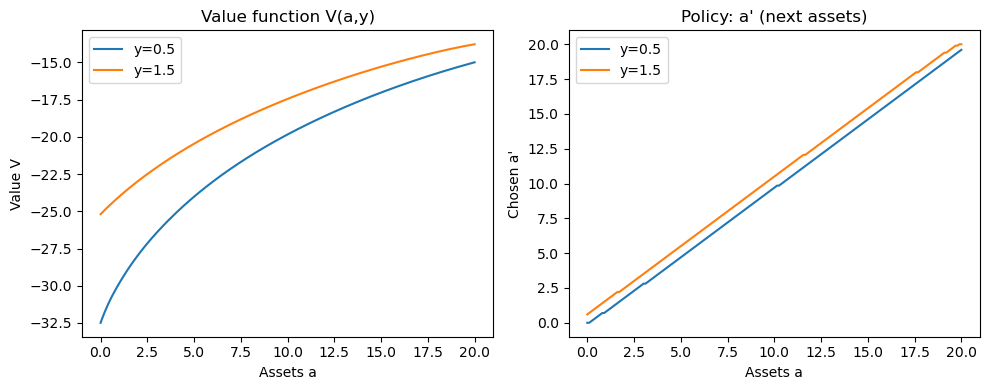

In [9]:
# VFI implementation for a simple consumption-savings problem with discrete income (runnable)
# This version has extra inline comments explaining shapes, broadcasting, and algorithmic steps.

import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Model parameters
# -------------------------
# Discount factor: how much agents value the future vs present
beta = 0.96

# Interest rate on assets (gross return = 1 + r)
r = 0.04

# CRRA risk aversion parameter (gamma = 1 is log utility; here we use 2 as a common example)
gamma = 2.0

# Asset grid: we discretize assets between a_min and a_max with Na points
a_min, a_max, Na = 0.0, 20.0, 200
a_grid = np.linspace(a_min, a_max, Na)  # shape (Na,)

# -------------------------
# Income process (discrete)
# -------------------------
# Two income states for simplicity: low and high
y_vals = np.array([0.5, 1.5])           # shape (Ny,) where Ny = 2

# Transition matrix P: P[iy, jy] = Prob(y' = jy | current y = iy)
# Rows should sum to 1. Here we use a simple persistence structure.
P = np.array([[0.9, 0.1],
              [0.1, 0.9]])              # shape (Ny, Ny)

# -------------------------
# Utility function
# -------------------------
def utility(c):
    """CRRA utility with safeguard to avoid taking powers/log of nonpositive numbers.
    This function accepts array input via numpy broadcasting and returns an array of same shape.
    """
    c_safe = np.maximum(c, 1e-12)  # prevent nonpositive consumption
    if gamma == 1.0:
        return np.log(c_safe)
    else:
        return (c_safe ** (1.0 - gamma)) / (1.0 - gamma)

# -------------------------
# Value function initialization
# -------------------------
# V[a_index, y_index] stores the value of being at assets a_grid[a_index] and income y_vals[y_index]
V = np.zeros((Na, len(y_vals)))  # initial guess: zeros

# Convergence settings
tol = 1e-6
max_iter = 2000

# -------------------------
# Value Function Iteration (VFI)
# -------------------------
# The main loop performs Bellman updates until V converges.
# At each iteration and for each current income state 'iy' we:
# 1. For each current asset a (index ia), consider all candidate next-period assets a' (indexed by ia_prime).
# 2. Compute feasible consumption c = (1+r)*a + y - a' for each pair (a, a').
#    This produces a matrix of shape (Na, Na) where rows correspond to current a and columns to a'.
# 3. Compute one-period utility U(c) for the entire (Na, Na) matrix.
# 4. Compute the expected continuation value for each candidate a' as:
#       E[V(a', y')] = sum_{y'} P[iy, y'] * V[a_prime_index, y']
#    This yields a vector of length Na (indexed by a').
# 5. Add the discounted continuation value to the one-period utility (broadcasted over rows).
# 6. Maximize over a' (columns) to update V_new[a, iy].
#
# Vectorization notes:
# - We build the consumption matrix c with broadcasting: a_grid[:, None] (shape (Na,1)) and a_grid[None, :] (shape (1,Na)).
# - The continuation value cont is computed as an expected value across next-period income states using matrix multiply.
# - cont has shape (Na,) and is added to every row of U (hence cont[None, :]).

for it in range(max_iter):
    V_new = np.empty_like(V)  # placeholder for updated value function

    # Loop over current income states (small dimension Ny = 2 here — looping is fine)
    for iy, y in enumerate(y_vals):
        # Build candidate consumption matrix:
        # For current assets along rows (shape (Na,1)) and a' along columns (shape (1,Na))
        # c[ia, ia_prime] = (1+r)*a_grid[ia] + y - a_grid[ia_prime]
        c = (1.0 + r) * a_grid[:, None] + y - a_grid[None, :]
        c = np.maximum(c, 1e-12)  # enforce nonnegativity for numerical stability

        # One-period utility for every (a, a') pair: shape (Na, Na)
        U = utility(c)

        # Expected continuation value for each candidate a' (vector of length Na):
        # P[iy, :] is the row of transition probabilities from current income state iy
        # V.T has shape (Ny, Na) after transpose, so (P[iy, :] @ V.T) yields a vector of length Na
        # Multiply by beta to discount future utility.
        cont = beta * (P[iy, :] @ V.T).T  # shape (Na,)

        # Right-hand side: one-period utility + discounted expected continuation value
        # We add cont[None, :] (shape (1, Na)) to U (shape (Na, Na)); broadcasting applies across rows.
        RHS = U + cont[None, :]

        # Maximize over columns (a' choices) for each row (current a)
        # axis=1 corresponds to maximizing across candidate a' for each current a
        V_new[:, iy] = np.max(RHS, axis=1)

    # Compute sup-norm difference for convergence check
    diff = np.max(np.abs(V_new - V))
    V[:] = V_new  # update value function

    if diff < tol:
        print(f'Converged after {it+1} iterations, diff={diff:.2e}')
        break
else:
    print('VFI did not converge within max_iter')

# -------------------------
# Recovering the policy function
# -------------------------
# After convergence, recover the argmax (policy) that attains the maximum for each (a, y).
# policy_idx[a_index, y_index] = index of a' chosen (an integer index into a_grid)
policy_idx = np.empty_like(V, dtype=int)

for iy, y in enumerate(y_vals):
    # Recompute the same RHS components to obtain argmax (this repeats some computation;
    # in production code you might store argmax during the VFI loop to avoid recomputing)
    c = (1.0 + r) * a_grid[:, None] + y - a_grid[None, :]
    c = np.maximum(c, 1e-12)
    U = utility(c)
    cont = beta * (P[iy, :] @ V.T).T
    RHS = U + cont[None, :]
    policy_idx[:, iy] = np.argmax(RHS, axis=1)   # index of optimal a' for each current a

# Convert index to actual asset choices a' (policy in levels)
policy_a_prime = a_grid[policy_idx]  # shape (Na, Ny)

# -------------------------
# Plots: value functions and policy functions
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Value functions for the two income states
axes[0].plot(a_grid, V[:, 0], label=f'y={y_vals[0]}')
axes[0].plot(a_grid, V[:, 1], label=f'y={y_vals[1]}')
axes[0].set_title('Value function V(a,y)')
axes[0].set_xlabel('Assets a')
axes[0].set_ylabel('Value V')
axes[0].legend()

# Policy: a' choice as function of current assets for each income state
axes[1].plot(a_grid, policy_a_prime[:, 0], label=f'y={y_vals[0]}')
axes[1].plot(a_grid, policy_a_prime[:, 1], label=f'y={y_vals[1]}')
axes[1].set_title("Policy: a' (next assets)")
axes[1].set_xlabel('Assets a')
axes[1].set_ylabel("Chosen a'")
axes[1].legend()

plt.tight_layout()
plt.show()


## Endogenous Grid Method (EGM) — intuition & sketch

EGM is useful when the problem's Euler equation can be inverted easily (e.g., CRRA utility and a single continuous state like assets).  
Key idea:
1. Work on grid for next-period assets $a'$.  
2. Compute expected marginal utility of consumption tomorrow on that grid.  
3. Invert the Euler equation to get current consumption $c$ at the implied current asset $a$.  
4. This produces (a, c(a)) pairs that are interpolated back onto the original asset grid.

EGM avoids root finding at each $a$ and is often substantially faster than naive VFI for single-state problems.


## Exercises (in-class / take-home)
1. **Deterministic growth model.** Implement VFI for the deterministic growth model with log utility and Cobb–Douglas production $f(k)=k^\alpha$. Compute policy and value functions.  
2. **Two-state income.** Modify the VFI above to increase Na and explore how solution time scales. Try different gamma values.  
3. **EGM practice.** Implement the EGM for the consumption–savings model (single-state stochastic income if you like). Compare runtime vs VFI for a moderate grid.  
4. **Policy iteration.** For a finite-state discretized model, implement policy iteration and compare number of iterations to VFI for high beta (e.g., beta=0.99).


## Suggested readings
- Stokey, Lucas & Prescott (1989), *Recursive Methods in Economic Dynamics*.  
- Judd (1998), *Numerical Methods in Economics*.  
- Ljungqvist & Sargent, *Recursive Macroeconomic Theory*.  
- Carroll (2006), "The method of endogenous gridpoints for solving dynamic stochastic optimization problems".


## Endogenous Grid Method (EGM) — commented implementation and runtime comparison

Below we provide:
- A **clear, commented implementation** of the Endogenous Grid Method (EGM) for a single-state
  consumption–savings model (CRRA utility, deterministic labor income).
- A **comparable VFI** implementation for the same deterministic model (so the two methods solve
  the same problem).
- A **runtime comparison** across several asset-grid sizes to illustrate the computational advantages
  of EGM in this canonical setting.

Notes:
- For clarity we implement the deterministic-income version of the model (no stochastic shocks).
- The EGM algorithm implemented here follows the common textbook recipe:
  1. Start with an initial guess for the consumption policy on the asset grid.
  2. Given the *previous* period consumption function, compute marginal utility next period at each a'.
  3. Invert Euler to get current consumption at the *implied* current asset (endogenous grid).
  4. Interpolate the resulting (a_implied, c_current) pairs back to the original a_grid.
  5. Repeat until the consumption policy converges.


Na=100: VFI time=0.0215s (iters=340), EGM time=0.1228s (iters=278)
Na=200: VFI time=0.0516s (iters=340), EGM time=0.2212s (iters=278)
Na=400: VFI time=0.1746s (iters=340), EGM time=0.4007s (iters=278)
Na=800: VFI time=0.7144s (iters=340), EGM time=0.7690s (iters=278)


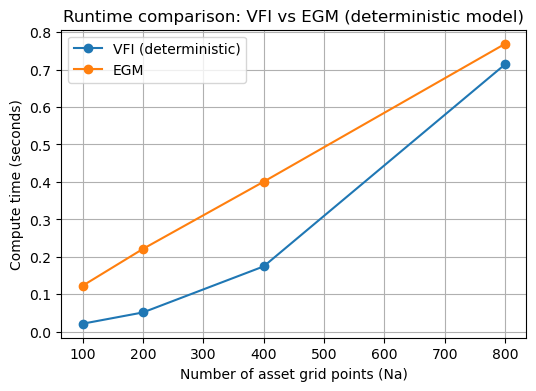

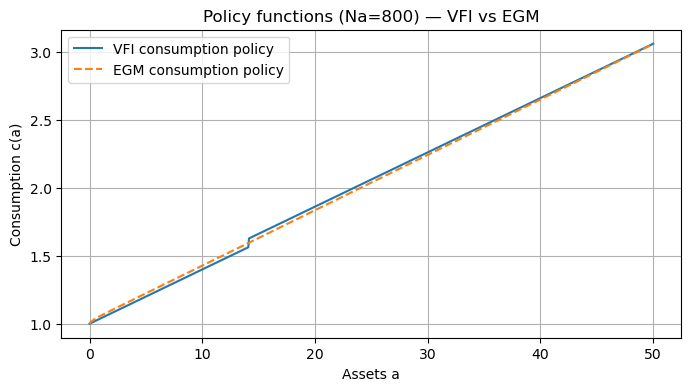

In [10]:
# EGM vs VFI: implementations and timing comparison
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import interpolate

# -------------------------
# Model primitives (deterministic income)
# -------------------------
beta = 0.96       # discount factor
r = 0.04          # interest rate
gamma = 2.0       # CRRA risk aversion (gamma=1 is log utility)
y = 1.0           # deterministic income each period
a_min = 0.0       # borrowing constraint (natural boundary)
# We'll vary a_max and Na (grid size) below for timing comparison.

# Utility and marginal utility functions
def u(c):
    c_safe = np.maximum(c, 1e-12)
    if gamma == 1.0:
        return np.log(c_safe)
    else:
        return (c_safe ** (1.0 - gamma)) / (1.0 - gamma)

def mu(c):
    # marginal utility u'(c) = c^{-gamma} for CRRA
    c_safe = np.maximum(c, 1e-12)
    return c_safe ** (-gamma)

def mu_inv(mu_val):
    # inverse marginal utility: given marginal utility, return c
    # For CRRA: mu = c^{-gamma} => c = mu^{-1/gamma}
    return mu_val ** (-1.0 / gamma)

# -------------------------
# VFI implementation for deterministic model (function)
# -------------------------
def solve_vfi_det(a_grid, beta=beta, r=r, y=y, tol=1e-6, max_iter=2000):
    """Solve deterministic consumption-savings via naive VFI on given asset grid.
    Returns: consumption policy c_policy (shape Na,), value function V (Na,), and timing info.
    """
    Na = len(a_grid)
    V = np.zeros(Na)                # initial guess for value function
    c_policy = np.zeros(Na)         # to store policy in levels
    # Precompute resource (cash-on-hand) for state a and candidate a'
    # We'll vectorize across a (rows) and a' (cols)
    A = a_grid[:, None]             # shape (Na,1)
    Aprime = a_grid[None, :]        # shape (1,Na)

    start = time.perf_counter()
    for it in range(max_iter):
        V_new = np.empty_like(V)
        # compute RHS for all (a, a') pairs
        cons = (1.0 + r) * A + y - Aprime   # shape (Na, Na)
        cons = np.maximum(cons, 1e-12)
        U = u(cons)                         # shape (Na, Na)
        # continuation value is V evaluated at a' (vector length Na), broadcast across rows
        cont = beta * V[None, :]            # shape (1, Na)
        RHS = U + cont                      # shape (Na, Na)
        V_new = np.max(RHS, axis=1)        # max over columns (a') for each row (current a)
        # Check convergence
        diff = np.max(np.abs(V_new - V))
        V[:] = V_new
        if diff < tol:
            break
    end = time.perf_counter()
    # Recover policy (argmax)
    cons = (1.0 + r) * A + y - Aprime
    cons = np.maximum(cons, 1e-12)
    U = u(cons)
    cont = beta * V[None, :]
    RHS = U + cont
    idx = np.argmax(RHS, axis=1)
    c_policy = cons[np.arange(Na), idx]
    return c_policy, V, end - start, it+1

# -------------------------
# EGM implementation for deterministic model (function)
# -------------------------
def solve_egm_det(a_grid, beta=beta, r=r, y=y, tol=1e-6, max_iter=2000):
    """Solve deterministic consumption-savings via EGM with safe interpolation."""
    Na = len(a_grid)
    # initial guess: consume half of cash-on-hand
    c_policy = 0.5 * ((1.0 + r) * a_grid + y)
    c_policy = np.maximum(c_policy, 1e-12)

    start = time.perf_counter()
    for it in range(max_iter):
        # 1) next-period consumption on a' grid
        c_next = c_policy.copy()
        # 2) next-period marginal utility
        muc_next = mu(c_next)
        # 3) invert Euler: u'(c) = beta(1+r)u'(c')
        factor = beta * (1.0 + r) * muc_next
        # guard against numerical under/overflow
        factor = np.maximum(factor, 1e-300)
        c_current_at_a_prime = mu_inv(factor)

        # 4) implied current asset that leads to (c_current, a')
        a_implied = (c_current_at_a_prime + a_grid - y) / (1.0 + r)

        # 5) borrowing constraint handling: if a_implied < a_min, the correct solution is a=a_min
        mask_below = a_implied < a_min
        if np.any(mask_below):
            a_implied[mask_below] = a_min
            # at the constraint the optimal a' is a_min; consumption there is c = (1+r)a_min + y - a'
            # since we are sitting at a=a_min, set a' = a_min for the constraint point
            # i.e., c = y + r*a_min - a_min = y + (r-1)*a_min; with a_min=0 this is y
            c_current_at_a_prime[mask_below] = (1.0 + r) * a_min + y - a_min

        # 6) sort by a_implied and collapse duplicate x's (take max c for each unique a)
        sort_idx = np.argsort(a_implied)
        x = a_implied[sort_idx]
        y_c = c_current_at_a_prime[sort_idx]

        # collapse duplicates robustly
        unique_x = []
        unique_c = []
        i = 0
        n = x.size
        while i < n:
            j = i + 1
            while j < n and x[j] == x[i]:
                j += 1
            unique_x.append(x[i])
            # at duplicated a (notably a_min), keep the largest feasible consumption
            unique_c.append(np.max(y_c[i:j]))
            i = j

        x = np.asarray(unique_x)
        y_c = np.asarray(unique_c)

        # ensure we have the constraint anchor explicitly (use correct c at a_min)
        if x[0] > a_min:
            x = np.insert(x, 0, a_min)
            y_c = np.insert(y_c, 0, (1.0 + r) * a_min + y - a_min)

        # if any tiny non-monotonicity remains, enforce strictly increasing x by jittering eps
        # (rarely needed, but keeps interp1d happy)
        eps = 0.0
        for k in range(1, x.size):
            if x[k] <= x[k-1]:
                eps = max(eps, 1e-12 * (1.0 + abs(x[k-1])))
                x[k] = x[k-1] + eps

        # 7) interpolate back to the original grid
        interp = interpolate.interp1d(x, y_c, kind='linear', bounds_error=False, fill_value='extrapolate')
        c_new = interp(a_grid)
        c_new = np.maximum(c_new, 1e-12)

        # 8) convergence
        diff = np.max(np.abs(c_new - c_policy))
        c_policy[:] = c_new
        if diff < tol:
            break

    end = time.perf_counter()
    return c_policy, end - start, it + 1

# -------------------------
# Timing comparison across grid sizes
# -------------------------
grid_sizes = [100, 200, 400, 800]  # adjust depending on runtime tolerance in this environment
vfi_times = []
egm_times = []
vfi_iters = []
egm_iters = []

for Na in grid_sizes:
    a_max = 50.0
    a_grid = np.linspace(a_min, a_max, Na)

    # Time VFI (deterministic)
    c_vfi, V_vfi, t_vfi, it_vfi = solve_vfi_det(a_grid)
    vfi_times.append(t_vfi)
    vfi_iters.append(it_vfi)

    # Time EGM
    c_egm, t_egm, it_egm = solve_egm_det(a_grid)
    egm_times.append(t_egm)
    egm_iters.append(it_egm)

    print(f"Na={Na}: VFI time={t_vfi:.4f}s (iters={it_vfi}), EGM time={t_egm:.4f}s (iters={it_egm})")

# -------------------------
# Plot timing results
# -------------------------
plt.figure(figsize=(6,4))
plt.plot(grid_sizes, vfi_times, marker='o', label='VFI (deterministic)')
plt.plot(grid_sizes, egm_times, marker='o', label='EGM')
plt.xlabel('Number of asset grid points (Na)')
plt.ylabel('Compute time (seconds)')
plt.title('Runtime comparison: VFI vs EGM (deterministic model)')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# Show policy functions for the finest grid
# -------------------------
Na = grid_sizes[-1]
a_grid = np.linspace(a_min, 50.0, Na)
c_vfi, V_vfi, t_vfi, it_vfi = solve_vfi_det(a_grid)
c_egm, t_egm, it_egm = solve_egm_det(a_grid)

plt.figure(figsize=(8,4))
plt.plot(a_grid, c_vfi, label='VFI consumption policy')
plt.plot(a_grid, c_egm, label='EGM consumption policy', linestyle='--')
plt.xlabel('Assets a')
plt.ylabel('Consumption c(a)')
plt.title(f'Policy functions (Na={Na}) — VFI vs EGM')
plt.legend()
plt.grid(True)
plt.show()


### Notes on the comparison
- The EGM method here solves the same deterministic problem more efficiently because it avoids maximizing over a' at each grid point; instead it constructs a mapping from a' to implied a and inverts it via interpolation.
- For stochastic problems with Markov income, EGM can be extended but requires computing expected marginal utilities (integration over shocks), which slightly complicates the implementation — the performance advantages generally remain for single-state control problems.
- The runtime numbers printed above are illustrative and will depend on the machine and environment; they show how EGM scales more gently with grid size compared to naive VFI.


## EGM extended to discrete Markov income (stochastic EGM)

This section implements the Endogenous Grid Method (EGM) for a consumption–savings
problem with a **discrete Markov income process**. The key difference from the deterministic
EGM is that the expected marginal utility next period must average over the possible income
states next period using the transition matrix.

We implement `solve_egm_stochastic` which iterates on the consumption policy
`c(a, y)` defined on a grid of assets and on the discrete income states.
The algorithm (high level) for each current income state y_i:
1. For each candidate next asset a' (grid point), collect c_next(a', y') across all possible y' (from previous iterate).
2. Compute expected marginal utility: muc_next(a') = sum_{y'} P[y_i, y'] * u'( c_next(a', y') ).
3. Invert Euler to get current consumption c(a_implied, y_i) at each a' via c = (beta*(1+r)*muc_next)^{-1/gamma}.
4. Compute implied current asset a_implied = (c + a' - y_i) / (1+r).
5. Handle points where a_implied < borrowing constraint and interpolate to map back to the original grid.

The function returns the converged consumption policy c_policy (shape Na x Ny), timing, and iterations.


In [11]:
from IPython.display import HTML, display

display(HTML("""
<style>
/* Expand notebook width */
.container { 
    width: 100% !important;
}

/* Disable output scrolling */
.output_scroll {
    height: auto !important;
    max-height: none !important;
    overflow-y: visible !important;
}

/* Also expand output area width */
.output_wrapper, .output {
    overflow-x: visible !important;
}
</style>
"""))


Stochastic EGM converged in 2000 iters, time 0.4662s


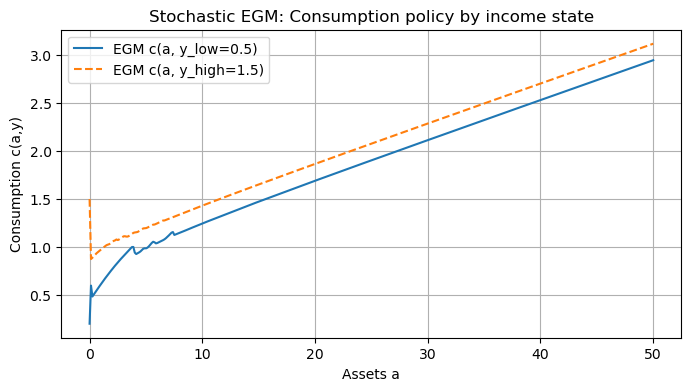

In [12]:
# EGM for stochastic income (discrete Markov) + demo run
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import interpolate

# Model primitives (shared)
beta = 0.96
r = 0.04
gamma = 2.0
a_min = 0.0

def mu(c):
    c_safe = np.maximum(c, 1e-12)
    return c_safe ** (-gamma)

def mu_inv(mu_val):
    return mu_val ** (-1.0 / gamma)

# -------------------------
# Stochastic EGM solver
# -------------------------
def solve_egm_stochastic(a_grid, y_vals, P, beta=beta, r=r, tol=1e-6, max_iter=2000):
    """Endogenous Grid Method for a model with discrete Markov income.
    Inputs:
      - a_grid: 1D array of asset grid points (Na,)
      - y_vals: 1D array of income states (Ny,)
      - P: transition matrix shape (Ny, Ny) with rows summing to 1
    Returns:
      - c_policy: consumption policy array shape (Na, Ny) mapping (a, y) -> c
      - elapsed_time: seconds
      - n_iter: iterations taken
    Notes:
      - We iterate on the consumption policy c(a, y).
      - For each current income state i and for each a' in the grid we compute expected
        marginal utility using P[i, :], invert Euler, get implied a, then interpolate.
    """
    Na = len(a_grid)
    Ny = len(y_vals)

    # Initial guess: consume a fraction of cash-on-hand for each income state
    # cash on hand = (1+r)*a + y, choose to consume half of it initially
    coh = (1.0 + r) * a_grid[:, None] + y_vals[None, :]   # shape (Na, Ny)
    c_policy = 0.5 * coh                                   # initial c(a,y), shape (Na, Ny)
    c_policy = np.maximum(c_policy, 1e-12)

    start = time.perf_counter()
    for it in range(max_iter):
        c_new = np.empty_like(c_policy)
        # For each current income state y_i compute implied a and c from a' grid
        for iy, y in enumerate(y_vals):
            # For each candidate a' (index j), we need c_next at (a'=a_grid[j], every y')
            # Extract c_next(a', y') as a vector of length Ny for each a' -- that's c_policy[j, :].
            # We'll loop over a' index vectorized with array ops.
            # c_next_matrix has shape (Na, Ny) where row j corresponds to a'=a_grid[j] across y'
            c_next_matrix = c_policy.copy()  # shape (Na, Ny): rows are a' indices

            # Compute marginal utility at next period for each (a', y') -> shape (Na, Ny)
            muc_next = mu(c_next_matrix)     # shape (Na, Ny)

            # Compute expected marginal utility conditional on current income state iy:
            # For each a' (row), take inner product with P[iy, :] over columns (y' dimension)
            # This yields a vector of length Na: muc_exp[j] = sum_{y'} P[iy, y'] * muc_next[j, y']
            muc_exp = muc_next @ P[iy, :].T   # shape (Na,)   (matrix-vector multiplication)

            # Invert Euler condition for each a' to get current consumption associated with that a'
            factor = beta * (1.0 + r) * muc_exp
            c_current_at_aprime = mu_inv(factor)   # shape (Na,)

            # Get implied current asset for each a' using budget identity:
            # a = (c + a' - y) / (1+r)
            a_implied = (c_current_at_aprime + a_grid - y) / (1.0 + r)  # shape (Na,)

            # Handle borrowing constraint: where a_implied < a_min, set a_implied = a_min and recompute c
            mask = a_implied < a_min
            if np.any(mask):
                a_implied[mask] = a_min
                # recompute c for these a' from budget: c = (1+r)*a_min + y - a'
                c_current_at_aprime[mask] = (1.0 + r) * a_min + y - a_grid[mask]

            # Now we have pairs (a_implied, c_current_at_aprime) of length Na.
            # Sort by a_implied (necessary for monotone interpolation)
            sort_idx = np.argsort(a_implied)
            a_sorted = a_implied[sort_idx]
            c_sorted = c_current_at_aprime[sort_idx]

            # Remove duplicate a's to avoid zero denominators in slope calculation
            a_unique, unique_idx = np.unique(a_sorted, return_index=True)
            c_unique = c_sorted[unique_idx]

            # Interpolate onto original a_grid to get c(a_grid, y_i)
            interp = interpolate.interp1d(a_unique, c_unique, kind='linear',
                                          bounds_error=False, fill_value='extrapolate')
            c_on_grid = interp(a_grid)
            c_on_grid = np.maximum(c_on_grid, 1e-12)
            c_new[:, iy] = c_on_grid

        # Convergence check across all (a,y)
        diff = np.max(np.abs(c_new - c_policy))
        c_policy[:] = c_new
        if diff < tol:
            break

    elapsed = time.perf_counter() - start
    return c_policy, elapsed, it+1

# -------------------------
# Demo run: small Markov income process
# -------------------------
y_vals = np.array([0.5, 1.5])   # low and high income
P = np.array([[0.9, 0.1],
              [0.1, 0.9]])      # transition matrix (rows sum to 1)

Na = 400
a_max = 50.0
a_grid = np.linspace(a_min, a_max, Na)

c_stoch_egm, t_stoch_egm, it_stoch_egm = solve_egm_stochastic(a_grid, y_vals, P)
print(f'Stochastic EGM converged in {it_stoch_egm} iters, time {t_stoch_egm:.4f}s')

# Plot policy functions for each income state
plt.figure(figsize=(8,4))
plt.plot(a_grid, c_stoch_egm[:,0], label=f'EGM c(a, y_low={y_vals[0]})')
plt.plot(a_grid, c_stoch_egm[:,1], label=f'EGM c(a, y_high={y_vals[1]})', linestyle='--')
plt.xlabel('Assets a')
plt.ylabel('Consumption c(a,y)')
plt.title('Stochastic EGM: Consumption policy by income state')
plt.legend()
plt.grid(True)
plt.show()

### Notes
- This stochastic EGM iterates on the consumption policy across both assets and income states.
- Performance depends on Ny (number of income states) and Na (asset grid size). Expect runtime to scale roughly linearly in Ny for fixed Na.
- For smoother interpolation or better handling of kinks near borrowing constraints, one can use piecewise-linear splines or monotone cubic interpolation, but linear interpolation is robust and simple.


In [13]:
## 8. (Optional) Minimal Python illustration: value iteration for a small MDP

# simple value iteration for a small finite MDP
import numpy as np

# example: 2 states, 2 actions
P = {
  0: {0: [(1.0,0)], 1: [(1.0,1)]},   # action 0 keeps state 0, action 1 moves to state 1
  1: {0: [(1.0,1)], 1: [(1.0,1)]}    # absorbing state 1
}
R = {
  (0,0): 1.0, (0,1): 2.0,
  (1,0): 0.0, (1,1): 0.0
}
beta = 0.9
V = np.zeros(2)

for it in range(100):
    V_new = V.copy()
    for s in [0,1]:
        vals = []
        for a in [0,1]:
            expV = sum(p * V[s2] for (p,s2) in P[s][a])
            vals.append(R[(s,a)] + beta*expV)
        V_new[s] = max(vals)
    if np.max(np.abs(V_new - V)) < 1e-8:
        break
    V = V_new
print("Value function:", V)

Value function: [9.9997639 0.       ]
